In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import streamlit as st
import math

In [116]:

# Data Formation
def generate_linear_data():
    x = np.linspace(0, 15, 15)
    y = 2 * x + 1    
    noise = np.random.normal(0, 7, len(y)) 
    y = y + noise
    return x,y

# Cost Function
def compute_cost(x,y,w, b):
    f_wb = w * x + b

    m = len(x)
    cost = (f_wb - y) ** 2        
    j_wb = (1/(2 * m)) * np.sum(cost)

    return j_wb



# Gradient Function
def compute_gradient(x,y,w,b):
    m = len(x)
    f_wb = w * x + b
    dj_dw = (np.sum((f_wb - y) * x)) / m
    dj_db = (np.sum(f_wb - y)) / m

    return dj_dw, dj_db


def compute_gradient_descent(x,y,w_in,b_in,alpha,num_iters,compute_cost,compute_gradient):
    J_history = []
    p_history = []

    alpha = alpha
    num_iters = num_iters
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 10000:
            J_history.append( compute_cost(x,y,w,b))
            p_history.append([w,b])
        if i% math.ceil(num_iters/10) == 0:
                print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                    f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                    f"w: {w: 0.3e}, b:{b: 0.5e}")
        
    return w, b, J_history, p_history





Iteration    0: Cost 8.09e+00  dj_dw: -1.602e+02, dj_db: -1.576e+01   w:  1.602e+00, b: 1.57620e-01
Iteration    1: Cost 7.43e-01  dj_dw: -3.457e+01, dj_db: -3.591e+00   w:  1.947e+00, b: 1.93532e-01
Iteration    2: Cost 4.00e-01  dj_dw: -7.448e+00, dj_db: -9.624e-01   w:  2.022e+00, b: 2.03157e-01
Iteration    3: Cost 3.83e-01  dj_dw: -1.590e+00, dj_db: -3.942e-01   w:  2.038e+00, b: 2.07099e-01
Iteration    4: Cost 3.82e-01  dj_dw: -3.254e-01, dj_db: -2.710e-01   w:  2.041e+00, b: 2.09809e-01
Iteration    5: Cost 3.81e-01  dj_dw: -5.230e-02, dj_db: -2.439e-01   w:  2.042e+00, b: 2.12248e-01
Iteration    6: Cost 3.81e-01  dj_dw:  6.618e-03, dj_db: -2.375e-01   w:  2.042e+00, b: 2.14624e-01
Iteration    7: Cost 3.80e-01  dj_dw:  1.929e-02, dj_db: -2.357e-01   w:  2.041e+00, b: 2.16980e-01
Iteration    8: Cost 3.79e-01  dj_dw:  2.198e-02, dj_db: -2.348e-01   w:  2.041e+00, b: 2.19328e-01
Iteration    9: Cost 3.79e-01  dj_dw:  2.251e-02, dj_db: -2.341e-01   w:  2.041e+00, b: 2.21669e-01


(2.0409283040217896,
 0.2216685445780495,
 [8.087738520588477,
  0.7426757771424747,
  0.3996047896049872,
  0.38306243939730533,
  0.38175015030943527,
  0.381151040901221,
  0.38058812565295447,
  0.38002981849964157,
  0.37947463053977926,
  0.37892247648751576],
 [[1.6017632927694532, 0.15762038801803802],
  [1.9474782129469963, 0.19353232519818667],
  [2.021953326626687, 0.2031565239932181],
  [2.037855421020562, 0.2070988472743224],
  [2.041109321415969, 0.20980909024307504],
  [2.0416323702458588, 0.21224818825248465],
  [2.0415661898661104, 0.21462366661955842],
  [2.041373256582386, 0.21698035373144256],
  [2.0411534395838777, 0.21932794396848718],
  [2.0409283040217896, 0.2216685445780495]])

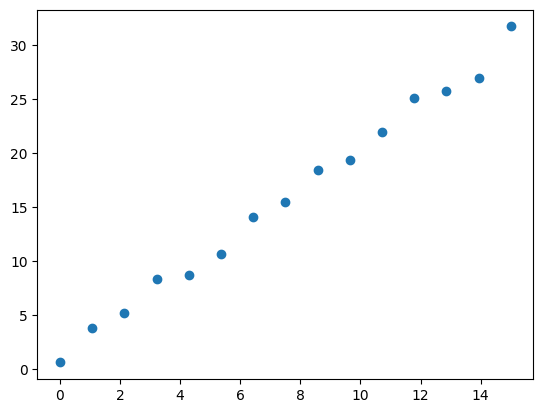

In [89]:
x,y = generate_linear_data()
plt.scatter(x,y)

compute_gradient_descent(x,y,0,0,1.0e-2,10,compute_cost,compute_gradient)

In [90]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 1000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = compute_gradient_descent(x ,y, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 8.09e+00  dj_dw: -1.602e+02, dj_db: -1.576e+01   w:  1.602e+00, b: 1.57620e-01
Iteration  100: Cost 3.39e-01  dj_dw:  1.768e-02, dj_db: -1.824e-01   w:  2.023e+00, b: 4.09941e-01
Iteration  200: Cost 3.14e-01  dj_dw:  1.345e-02, dj_db: -1.388e-01   w:  2.007e+00, b: 5.69334e-01
Iteration  300: Cost 2.99e-01  dj_dw:  1.023e-02, dj_db: -1.055e-01   w:  1.995e+00, b: 6.90564e-01
Iteration  400: Cost 2.90e-01  dj_dw:  7.778e-03, dj_db: -8.027e-02   w:  1.987e+00, b: 7.82769e-01
Iteration  500: Cost 2.85e-01  dj_dw:  5.916e-03, dj_db: -6.105e-02   w:  1.980e+00, b: 8.52898e-01
Iteration  600: Cost 2.82e-01  dj_dw:  4.499e-03, dj_db: -4.644e-02   w:  1.975e+00, b: 9.06236e-01
Iteration  700: Cost 2.81e-01  dj_dw:  3.422e-03, dj_db: -3.532e-02   w:  1.971e+00, b: 9.46804e-01
Iteration  800: Cost 2.80e-01  dj_dw:  2.603e-03, dj_db: -2.686e-02   w:  1.968e+00, b: 9.77659e-01
Iteration  900: Cost 2.79e-01  dj_dw:  1.980e-03, dj_db: -2.043e-02   w:  1.965e+00, b: 1.00113e+00


Iteration    0: Cost 3.24e+01  dj_dw: -1.556e+02, dj_db: -1.504e+01   w:  1.556e+00, b: 1.50375e-01
Iteration  100: Cost 2.52e+01  dj_dw: -2.712e-03, dj_db:  2.799e-02   w:  1.987e+00, b: 1.59739e-01
Iteration  200: Cost 2.52e+01  dj_dw: -2.063e-03, dj_db:  2.129e-02   w:  1.990e+00, b: 1.35283e-01
Iteration  300: Cost 2.52e+01  dj_dw: -1.569e-03, dj_db:  1.619e-02   w:  1.992e+00, b: 1.16683e-01
Iteration  400: Cost 2.52e+01  dj_dw: -1.193e-03, dj_db:  1.232e-02   w:  1.993e+00, b: 1.02536e-01
Iteration  500: Cost 2.52e+01  dj_dw: -9.076e-04, dj_db:  9.367e-03   w:  1.994e+00, b: 9.17757e-02
Iteration  600: Cost 2.52e+01  dj_dw: -6.903e-04, dj_db:  7.125e-03   w:  1.995e+00, b: 8.35920e-02
Iteration  700: Cost 2.52e+01  dj_dw: -5.250e-04, dj_db:  5.419e-03   w:  1.995e+00, b: 7.73677e-02
Iteration  800: Cost 2.52e+01  dj_dw: -3.993e-04, dj_db:  4.121e-03   w:  1.996e+00, b: 7.26336e-02
Iteration  900: Cost 2.52e+01  dj_dw: -3.037e-04, dj_db:  3.135e-03   w:  1.996e+00, b: 6.90329e-02


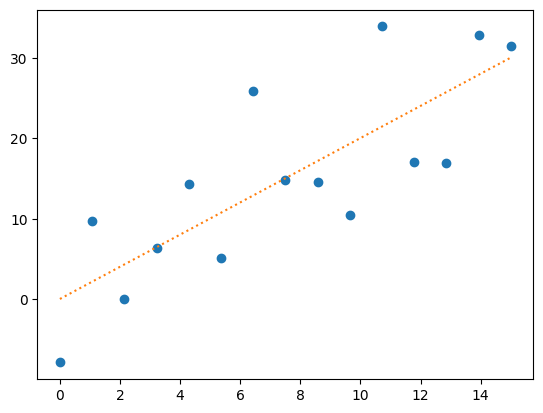

In [122]:
x,y = generate_linear_data()
w_final, b_final, J_hist, p_hist = compute_gradient_descent(x ,y, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
new_x = np.linspace(0, 15, 15)
new_y = w_final * x + b_final
plt.plot(new_x,new_y, linestyle = 'dotted',color='C1' )
plt.scatter(x,y)